### Darts - XGB & Linear

In [ ]:
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [ ]:
#train_df.set_index('DATE', drop=True, inplace= True)
#train_df = train_df.sort_values(by=['Mapped_GCK', 'DATE']) 
#train_df.head()

In [ ]:
train_df.reset_index(inplace=True)
train_df.head()

,index,DATE,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,0,2018-10,#1,36098918.79,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
1,1,2018-10,#11,1021303.50,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
2,2,2018-10,#12,28686.33,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
3,3,2018-10,#13,27666.10,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
4,4,2018-10,#14,5770.00,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233


In [ ]:
train_df['DATE'] = train_df['DATE'].dt.to_timestamp()
train_df['DATE'].dtype

dtype('<M8[ns]')

In [ ]:
val_df.head()

,DATE,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,2021-08,#1,36310817.42,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495
1,2021-08,#11,2715460.08,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495
2,2021-08,#12,143436.63,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495
3,2021-08,#13,10814.57,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495
4,2021-08,#14,0.00,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495


In [ ]:
val_df.set_index('DATE', drop=True, inplace= True)
val_df = val_df.sort_values(by=['Mapped_GCK', 'DATE']) 
val_df.head()

,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
DATE,,,,,,,,,,,,,,,,,,,,,
2021-08,#1,36310817.42,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,80.672925,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495
2021-09,#1,36278886.58,259.000496,259.000496,101.856355,118.187535,115.043611,142.354179,112.377521,132.621102,...,109.441628,116.868164,109.221512,141.776917,103.167849,130.525896,94.896408,107.302463,89.570641,111.697464
2021-10,#1,44483013.86,269.794432,269.794432,97.348255,116.870124,108.420507,129.555652,108.116229,127.270893,...,102.639595,109.614273,113.523598,137.017990,106.887313,117.832552,91.182419,98.881743,88.777977,106.231194
2021-11,#1,34187395.60,291.520030,291.520030,94.292783,116.357666,115.951560,141.759068,111.350249,136.249685,...,97.969543,119.170990,113.067886,142.677094,110.606777,127.053188,88.984337,104.366326,88.337608,110.047272
2021-12,#1,33950069.83,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,...,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956


In [ ]:
val_df.reset_index(inplace=True)
val_df['DATE'] = val_df['DATE'].dt.to_timestamp()
val_df['DATE'].dtype
val_df.head()

,DATE,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,2021-08-01,#1,36310817.42,253.723069,253.723069,63.856268,90.607333,100.880844,119.089013,61.338702,...,65.380714,99.481873,109.376541,125.740089,97.304965,116.395569,49.039917,85.712195,61.387154,103.446495
1,2021-09-01,#1,36278886.58,259.000496,259.000496,101.856355,118.187535,115.043611,142.354179,112.377521,...,109.441628,116.868164,109.221512,141.776917,103.167849,130.525896,94.896408,107.302463,89.570641,111.697464
2,2021-10-01,#1,44483013.86,269.794432,269.794432,97.348255,116.870124,108.420507,129.555652,108.116229,...,102.639595,109.614273,113.523598,137.017990,106.887313,117.832552,91.182419,98.881743,88.777977,106.231194
3,2021-11-01,#1,34187395.60,291.520030,291.520030,94.292783,116.357666,115.951560,141.759068,111.350249,...,97.969543,119.170990,113.067886,142.677094,110.606777,127.053188,88.984337,104.366326,88.337608,110.047272
4,2021-12-01,#1,33950069.83,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,...,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956


In [ ]:
full_df = pd.concat([train_df, val_df], ignore_index=True)
full_df.head()

,index,DATE,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,0.0,2018-10-01,#1,36098918.79,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
1,1.0,2018-10-01,#11,1021303.50,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
2,2.0,2018-10-01,#12,28686.33,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
3,3.0,2018-10-01,#13,27666.10,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
4,4.0,2018-10-01,#14,5770.00,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233


In [ ]:
full_df.head()

,index,DATE,Mapped_GCK,Sales_EUR,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,0.0,2018-10-01,#1,36098918.79,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
1,1.0,2018-10-01,#11,1021303.50,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
2,2.0,2018-10-01,#12,28686.33,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
3,3.0,2018-10-01,#13,27666.10,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
4,4.0,2018-10-01,#14,5770.00,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233


In [ ]:
# List of product IDs to check for outliers
product_ids_to_check = ['#1', '#3', '#4', '#5', '#8', '#9', '#13', '#14', '#16' '#20', '#36']

# Create a copy of the original DataFrame to avoid modifying the original
filtered_train = train_df.copy()

# Loop through each product and calculate boxplot thresholds
for product_id in product_ids_to_check:
    
    # Filter the data for the current product
    product_data = filtered_train[filtered_train['Mapped_GCK'] == product_id]
    
    # Calculate Q1, Q3, and IQR for the product
    Q1 = product_data['Sales_EUR'].quantile(0.25)
    Q3 = product_data['Sales_EUR'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.1 * IQR
    upper_bound = Q3 + 1.1 * IQR
    
    # Loop through each row and apply the boxplot-based outlier replacement logic
    for idx, row in product_data.iterrows():
        if row['Sales_EUR'] < lower_bound:
            filtered_train.at[idx, 'Sales_EUR'] = lower_bound  # Replace with lower bound
        elif row['Sales_EUR'] > upper_bound:
            filtered_train.at[idx, 'Sales_EUR'] = upper_bound  # Replace with upper bound

# The filtered_train DataFrame now has outliers replaced by the boxplot thresholds


In [ ]:
# Compute the correlation matrix for market indexes
corr_matrix = full_df.iloc[:, 4:].corr()

# Compute the variance of each feature
feature_variances = full_df.iloc[:, 4:].var()

# Drop the feature with the lower variance among correlated pairs
features_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
            if feature_variances[col1] < feature_variances[col2]:
                features_to_drop.add(col1)
            else:
                features_to_drop.add(col2)

# Remove selected features
full_df_reduced = full_df.drop(columns=features_to_drop)

print(f"Dropped {len(features_to_drop)} correlated features based on variance.")

Dropped 27 correlated features based on variance.


In [ ]:
train_df_reduced = filtered_train.drop(columns=features_to_drop)
val_df_reduced = val_df.drop(columns=features_to_drop)

In [ ]:
full_df_reduced.drop(columns = ['index'], inplace=True)
train_df_reduced.drop(columns = ['index'], inplace=True)
val_df_reduced.drop(columns = ['index'], inplace=True)

In [ ]:
full_df_reduced.head()

In [ ]:
y_all = TimeSeries.from_group_dataframe(full_df_reduced,
                                        group_cols=['Mapped_GCK'],
                                        time_col='DATE',
                                        value_cols='Sales_EUR')

future_cov_all = TimeSeries.from_group_dataframe(full_df_reduced,
                                                 group_cols=['Mapped_GCK'],
                                                 time_col='DATE',
                                                 value_cols=list(full_df_reduced.columns[4:]))

past_cov_all = TimeSeries.from_group_dataframe(full_df_reduced,
                                                 group_cols=['Mapped_GCK'],
                                                 time_col='DATE',
                                                 value_cols=list(full_df_reduced.columns[4:]))

In [ ]:
y_train_all = TimeSeries.from_group_dataframe(train_df_reduced,
                                        group_cols=['Mapped_GCK'],
                                        time_col='DATE',
                                        value_cols='Sales_EUR')

In [ ]:
sales_db.groupby('Mapped_GCK')[['Sales_EUR']].sum().sort_values('Sales_EUR', ascending= False).round(0)

,Sales_EUR
Mapped_GCK,
#1,1.544206e+09
#3,5.334435e+08
#5,4.295952e+08
#11,6.590132e+07
#8,3.487122e+07
#6,2.064189e+07
#16,1.839118e+07
#4,1.562720e+07
#12,8.279486e+06


In [ ]:
from darts.models import XGBModel

In [ ]:
train_df['Mapped_GCK'].unique()

array(['#1', '#11', '#12', '#13', '#14', '#16', '#20', '#3', '#36', '#4',
       '#5', '#6', '#8', '#9'], dtype=object)

In [ ]:
darts_model = XGBModel(lags=[-1, -2, -3, -4, -6, -9, -12],
                              lags_future_covariates=(0,1),
                              lags_past_covariates = 12,
                              output_chunk_length = 1,
                              use_static_covariates=False,
                              multi_models= True)

labels = ['#1', '#11', '#12', '#13', '#14', '#16', '#20', '#3', '#36', '#4',
       '#5', '#6', '#8', '#9']

# Create a dictionary to map each label to its corresponding TimeSeries
label_to_series = {label: y_train_all[i] for i, label in enumerate(labels)}

darts_model.fit(y_train_all, future_covariates=future_cov_all, past_covariates=past_cov_all)
#darts_model.fit(y_train_all, past_covariates=past_cov_all)

y_pred = darts_model.predict(n=9,
                             series=y_train_all[:14],
                             future_covariates=future_cov_all[:14],
                             past_covariates= past_cov_all[:14])

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.


In [ ]:
# Iterate over the predictions and print with the actual label
for i, series in enumerate(y_pred):
    # Get the label corresponding to the i-th series
    label = labels[i]
    
    # Convert to DataFrame to inspect the predictions
    pred_df = series.pd_dataframe()
    
    # Print prediction for the specific label
    print(f"Prediction for series with label '{label}':")
    print(pred_df)

Prediction for series with label '#1':
component    Sales_EUR
DATE                  
2021-08-01  35901288.0
2021-09-01  38333436.0
2021-10-01  39617280.0
2021-11-01  37131848.0
2021-12-01  37015084.0
2022-01-01  35343852.0
2022-02-01  36184760.0
2022-03-01  37693252.0
2022-04-01  38007528.0
Prediction for series with label '#11':
component     Sales_EUR
DATE                   
2021-08-01  1889029.500
2021-09-01  1311876.500
2021-10-01  1488147.500
2021-11-01  1029705.000
2021-12-01  1113643.875
2022-01-01  1283125.750
2022-02-01  1321390.500
2022-03-01  1568442.500
2022-04-01  1267050.125
Prediction for series with label '#12':
component       Sales_EUR
DATE                     
2021-08-01  324376.000000
2021-09-01  252764.546875
2021-10-01  174088.062500
2021-11-01  242507.328125
2021-12-01  210302.984375
2022-01-01  154166.484375
2022-02-01  184092.234375
2022-03-01  273409.062500
2022-04-01  198095.265625
Prediction for series with label '#13':
component      Sales_EUR
DATE         

In [ ]:
y_val_all = TimeSeries.from_group_dataframe(val_df_reduced,
                                             group_cols=['Mapped_GCK'],
                                             time_col='DATE',
                                             value_cols='Sales_EUR')

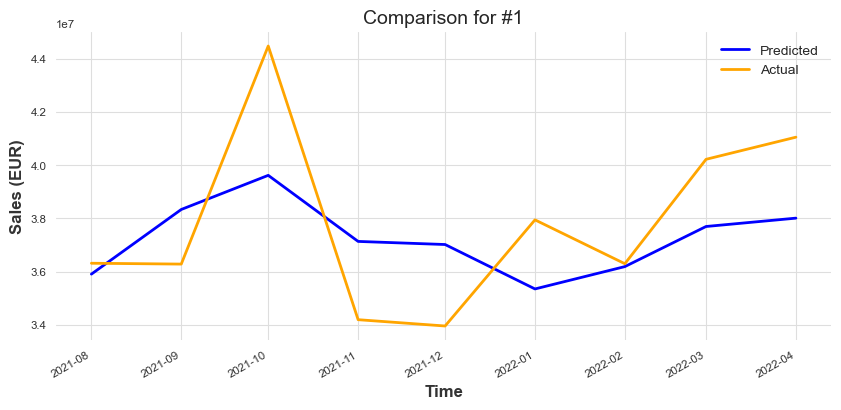

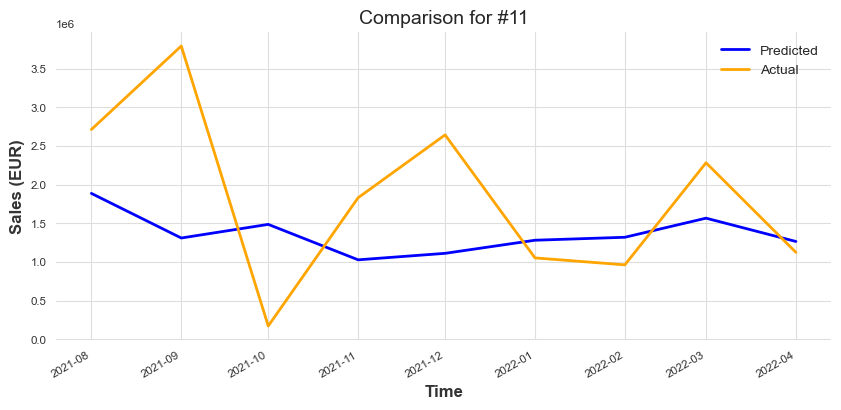

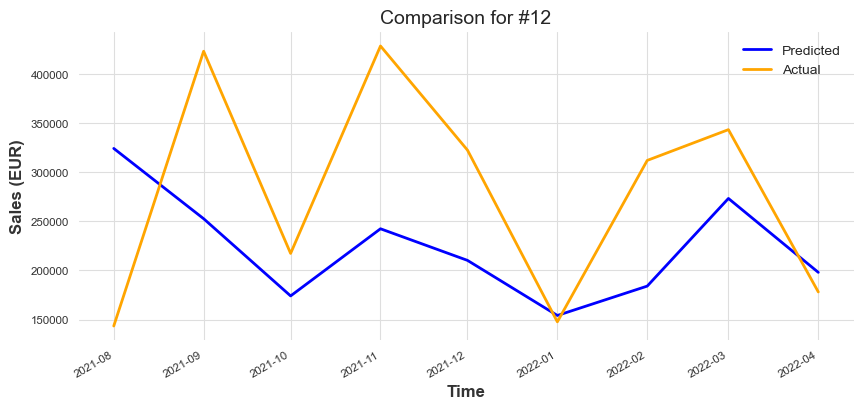

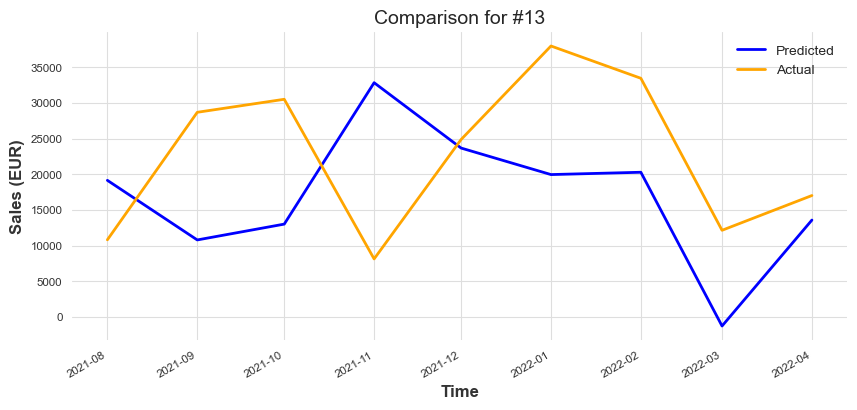

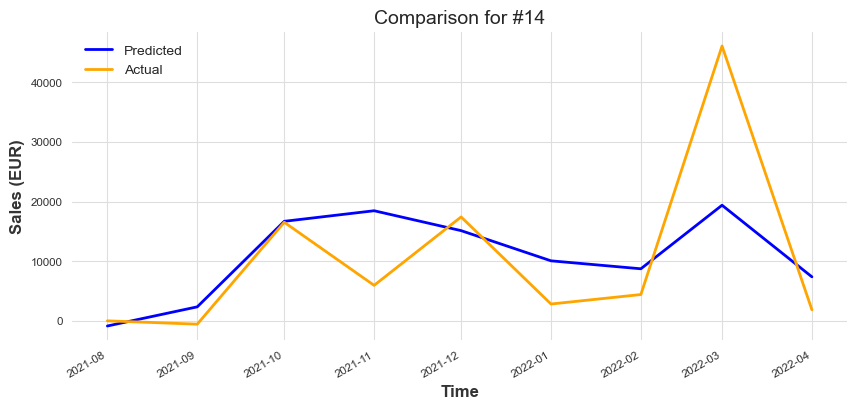

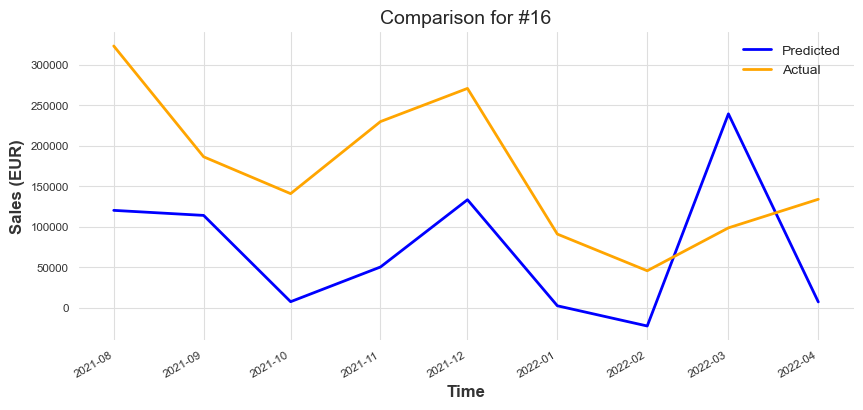

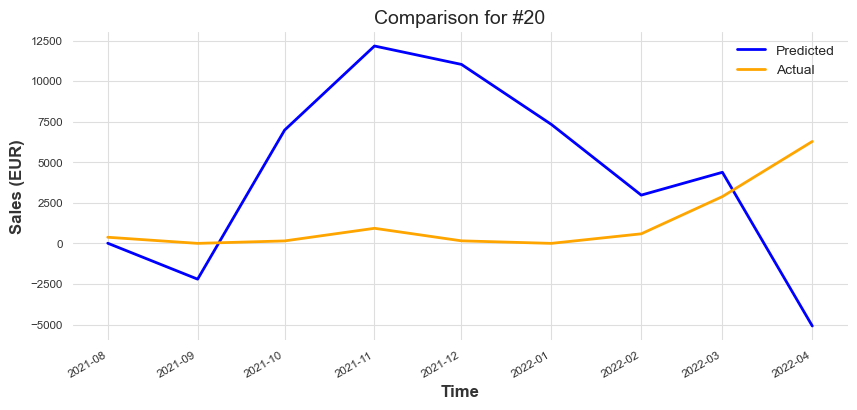

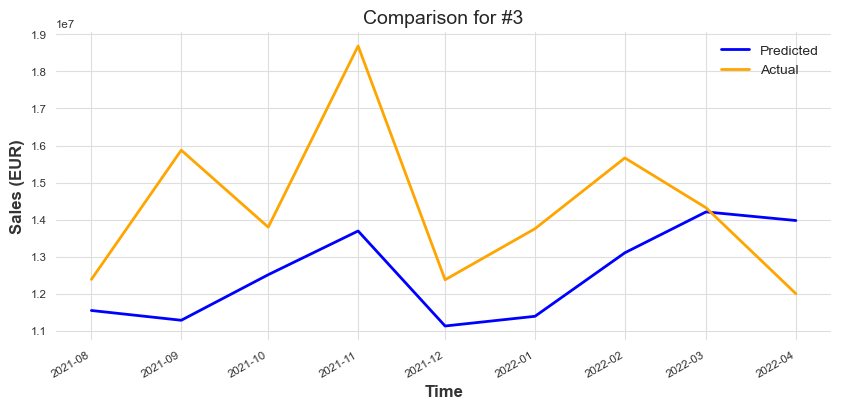

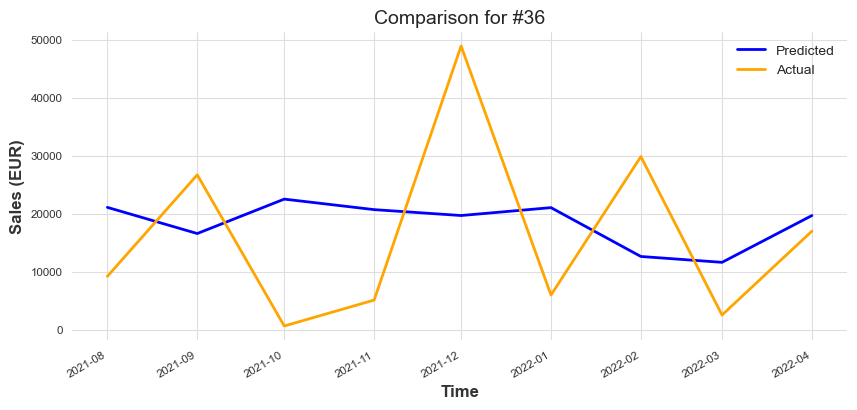

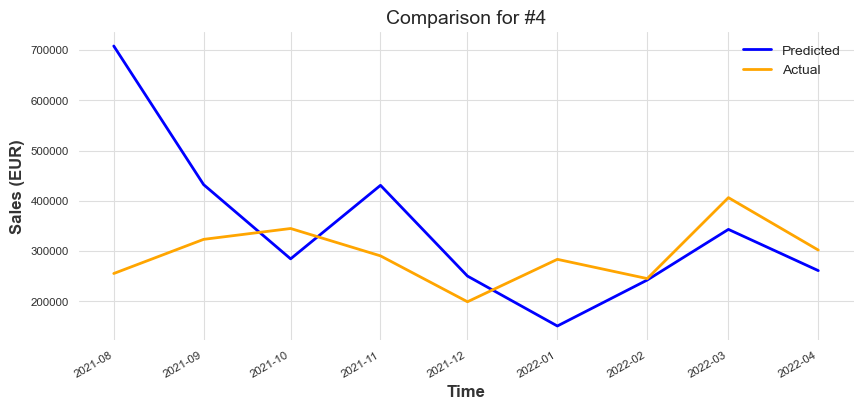

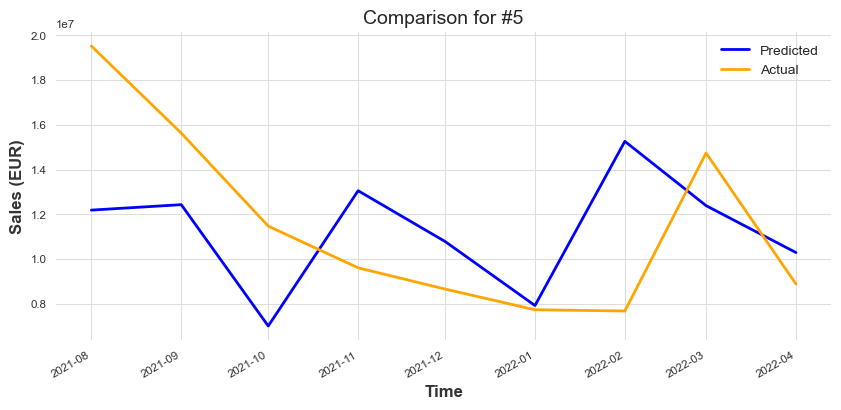

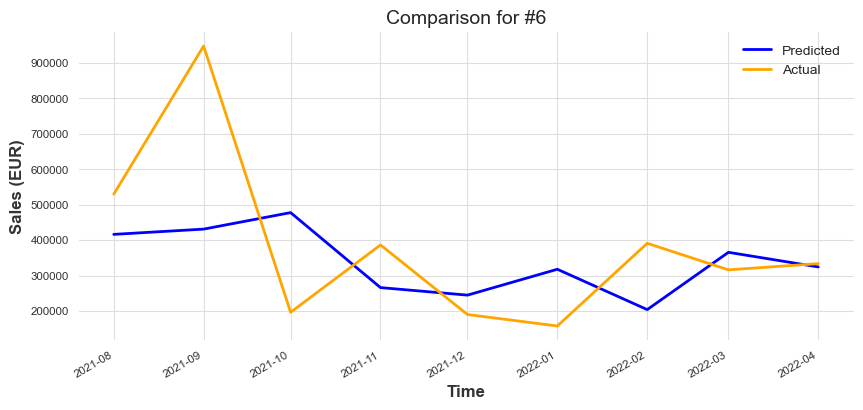

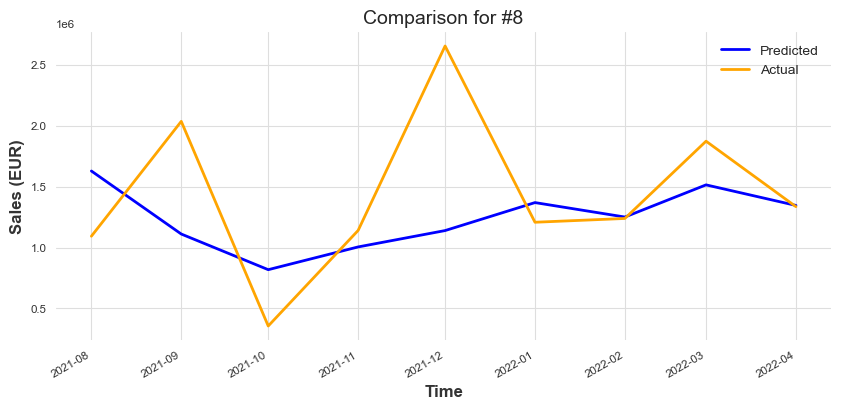

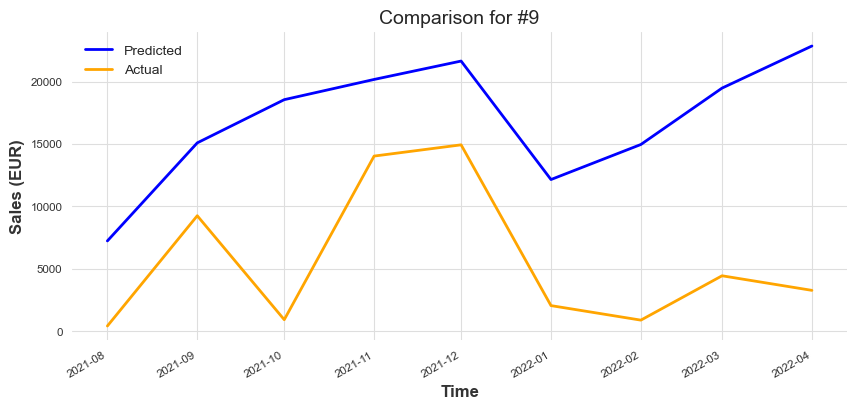

In [ ]:
# Plot predictions and actual values for each group
for i, pred_series in enumerate(y_pred):
    true_series = y_val_all[i]  # Corresponding actual series
    label = labels[i]  # Label for the current group
    
    # Create the plot
    plt.figure(figsize=(10, 4))
    pred_series.plot(label='Predicted', color='blue')  # Predicted series in blue
    true_series.plot(label='Actual', color='orange')  # Actual series in orange
    
    # Title and legend
    plt.title(f'Comparison for {label}', fontsize=14)
    plt.legend()
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Sales (EUR)', fontsize=12)
    
    # Display the plot
    plt.show()

In [ ]:
# For a single group comparison (e.g., the first group)
pred_df = y_pred[0].pd_dataframe()  # Predicted values DataFrame
true_df = y_val_all[0].pd_dataframe()  # Actual values DataFrame

# Join the dataframes on the date index. Use appropriate suffixes.
comparison_df = pred_df.join(true_df, lsuffix='_pred', rsuffix='_actual')
comparison_df.head()

component,Sales_EUR_pred,Sales_EUR_actual
DATE,,
2021-08-01,35901288.0,36310817.42
2021-09-01,38333436.0,36278886.58
2021-10-01,39617280.0,44483013.86
2021-11-01,37131848.0,34187395.60
2021-12-01,37015084.0,33950069.83


In [ ]:
# Get the predicted and actual values DataFrames
pred_df = y_pred[i].pd_dataframe()  # Predicted values DataFrame
true_df = y_val_all[i].pd_dataframe()  # Actual values DataFrame

# Join the dataframes on the date index. Use appropriate suffixes.
comparison_df = pred_df.join(true_df, lsuffix='_pred', rsuffix='_actual')

# Print the comparison DataFrame (first few rows)
print(f"Comparison for {labels[i]}:")
print(comparison_df.head())

Comparison for #9:
component   Sales_EUR_pred  Sales_EUR_actual
DATE                                        
2021-08-01     7242.479492            432.00
2021-09-01    15092.343750           9259.20
2021-10-01    18551.132812            937.04
2021-11-01    20169.886719          14035.58
2021-12-01    21642.199219          14935.20


In [ ]:
from darts.metrics import rmse

# Calculate and print the RMSE for each group with their respective labels
for i, pred_series in enumerate(y_pred):
    true_series = y_val_all[i]
    
    # Calculate RMSE for this group
    error_rmse = rmse(true_series, pred_series)
    
    # Print the RMSE for the corresponding label
    print(f'{labels[i]}: RMSE = {error_rmse:.0f}')

#1: RMSE = 2759992
#11: RMSE = 1168244
#12: RMSE = 121477
#13: RMSE = 14893
#14: RMSE = 10468
#16: RMSE = 135037
#20: RMSE = 7356
#3: RMSE = 2707857
#36: RMSE = 16437
#4: RMSE = 171957
#5: RMSE = 4288672
#6: RMSE = 221040
#8: RMSE = 651933
#9: RMSE = 12389
